In [1]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import regex as re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

# Wczytanie pliku tekstowego z listą stop words
def load_stop_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stop_words = [word.strip() for word in file.readlines()]
    return stop_words

# Ścieżka do pliku tekstowego z listą stop words
stop_words_file = 'Stopwords.txt'

# Wczytanie listy stop words z pliku
my_stop_words = load_stop_words(stop_words_file)

# Wczytanie danych z pliku Excel
df = pd.read_csv('result.csv')
df = df[['text', 'name', 'tweetLink']]

In [2]:
df.head(30)

,text,name,tweetLink
0,"Bill Gates chce, aby wszyscy doświadczyli mala...",Prześladowany Politycznie Banowany,https://twitter.com/banowany86345/status/16765...
1,"To są biedni ludzie, szukający swojego miejsca...",APrawdaWasWyzwoli,https://twitter.com/KrzychuBlues/status/167547...
2,Wojowniczo antyimigrancki Tusk na krótkim nagr...,Radosław Fogiel,https://twitter.com/radekfogiel/status/1675488...
3,"Szok😡. Tetiana Kamraceva-Holodupceva, ""uchodźc...",DUCH,https://twitter.com/PanDuchPL/status/167516486...
4,Kilka awantur w 🇩🇪 z ostatnich dni:\n- były am...,Patrycja Anna Tepper,https://twitter.com/tepper_anna/status/1676283...
5,A Wy co? Dalej biedni?\nNawet mi was nie żal. ...,Jakub Mościcki,https://twitter.com/Jakub_moscicki/status/1676...
6,W dzisiejszej @gazeta_wyborcza znajdziecie mój...,Marcin Wojewodka,https://twitter.com/WojewodkaMarcin/status/167...
7,Wpuście w końcu tych ludzi!\nTo są biedni ludz...,ɐllǝnuɐɯı,https://twitter.com/szef_dywizji/status/167453...
8,800 plus. Co trzeba wiedzieć?\n#wieszwięcej #8...,tvp.info 🇵🇱,https://twitter.com/tvp_info/status/1673669363...
9,"Jeżeli Wicemarszałek Sejmu, Ryszard Terlecki, ...",P@weł,https://twitter.com/winatuska1/status/16761687...


In [3]:
# # Pobieranie modelu języka polskiego w Spacy
# !python -m spacy download pl_core_news_md

# !pip install wordcloud

# # Załadowanie modelu języka polskiego
nlp = spacy.load('pl_core_news_md')

In [4]:
def clean_tweet(tweet):
    
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub(r'\bRT\b', '', tweet)
    
    # Tokenizacja tekstu na słowa
    tokens = word_tokenize(tweet)
    # Usunięcie znaków interpunkcyjnych i przekształcenie słów na małe litery
    words = [word.lower() for word in tokens if word.isalpha()]
    # Usunięcie stop words
    words = [word for word in words if word not in my_stop_words]
    # Analiza części mowy dla słów
    lemmas = []
    doc = nlp(' '.join(words))
    for token in doc:
        # Wybieramy tylko rzeczowniki (NOUN), czasowniki (VERB) i przymiotniki (ADJ)
        if token.pos_ in ['NOUN', 'VERB', 'ADJ']:
            lemmas.append(token.lemma_)
    
    # Połączenie lematów w jednozdaniowy tekst
    cleaned_tweet = ' '.join(lemmas)
    return cleaned_tweet

# Stworzenie nowej kolumny z wyczyszczonymi tweetami
df['CLEANED_TEXT'] = df['text'].apply(clean_tweet)

# Wyświetlenie wyczyszczonych tweetów
df.head(30)

,text,name,tweetLink,CLEANED_TEXT
0,"Bill Gates chce, aby wszyscy doświadczyli mala...",Prześladowany Politycznie Banowany,https://twitter.com/banowany86345/status/16765...,chcieć doświadczyć malaria biedny człowiek
1,"To są biedni ludzie, szukający swojego miejsca...",APrawdaWasWyzwoli,https://twitter.com/KrzychuBlues/status/167547...,biedny człowiek szukać miejsce ziemia
2,Wojowniczo antyimigrancki Tusk na krótkim nagr...,Radosław Fogiel,https://twitter.com/radekfogiel/status/1675488...,antyimigrancki tusk krótki nagranie biedny czł...
3,"Szok😡. Tetiana Kamraceva-Holodupceva, ""uchodźc...",DUCH,https://twitter.com/PanDuchPL/status/167516486...,szok tetiać kamracevaholodupceva uchodźczynia ...
4,Kilka awantur w 🇩🇪 z ostatnich dni:\n- były am...,Patrycja Anna Tepper,https://twitter.com/tepper_anna/status/1676283...,awantura ostatni dzień ambasador melnyk demolo...
5,A Wy co? Dalej biedni?\nNawet mi was nie żal. ...,Jakub Mościcki,https://twitter.com/Jakub_moscicki/status/1676...,biedn żal miliard wyciągnięcie ręka wolicie ro...
6,W dzisiejszej @gazeta_wyborcza znajdziecie mój...,Marcin Wojewodka,https://twitter.com/WojewodkaMarcin/status/167...,dzisiejszy znajdziecie komentarz rzeczywisty r...
7,Wpuście w końcu tych ludzi!\nTo są biedni ludz...,ɐllǝnuɐɯı,https://twitter.com/szef_dywizji/status/167453...,koniec człowiek biedny człowiek potrzebować po...
8,800 plus. Co trzeba wiedzieć?\n#wieszwięcej #8...,tvp.info 🇵🇱,https://twitter.com/tvp_info/status/1673669363...,wiedzieć wieszwięcej
9,"Jeżeli Wicemarszałek Sejmu, Ryszard Terlecki, ...",P@weł,https://twitter.com/winatuska1/status/16761687...,wicemarszałek sejm posiadać współpracownik asy...


In [5]:
# Tworzenie listy słów z oczyszczonych tweetów
all_words = ' '.join(df['CLEANED_TEXT']).split()

# Obliczanie częstości słów
word_freq = Counter(all_words)

# Wyświetlanie najczęściej występujących słów
for word, frequency in word_freq.most_common(100):
    print(f'{word}: {frequency}')

dziecko: 26
biedny: 21
rodzina: 21
świadczenie: 19
program: 19
człowiek: 17
zasiłek: 17
praca: 16
polski: 15
rząd: 15
projekt: 14
sejm: 13
chcieć: 12
mieć: 11
pracować: 11
ubóstwo: 10
przyjąć: 9
kolejny: 8
premier: 8
ustawa: 7
zwiększyć: 7
minister: 7
polityka: 7
waloryzacja: 7
osoba: 7
chodzić: 6
społeczny: 6
migrant: 6
mówić: 6
pogrzebowy: 6
widzieć: 5
dzisiejszy: 5
wiedzieć: 5
wieszwięcej: 5
prezes: 5
musieć: 5
duży: 5
państwo: 5
rok: 5
sytuacja: 5
szukać: 4
miejsce: 4
ziemia: 4
demograficzny: 4
tysiąc: 4
spotkanie: 4
być: 4
rada: 4
posiedzenie: 4
socjal: 4
rzecznik: 4
styczeń: 4
rodzic: 4
niski: 4
prawo: 4
ograniczyć: 4
dostać: 4
móc: 4
finansowy: 4
urodzenie: 4
świadczeć: 3
ostatni: 3
dzień: 3
wychowawczy: 3
biedn: 3
rządowy: 3
hipokryzjapis: 3
koniec: 3
pomoc: 3
posiadać: 3
wypłacać: 3
robić: 3
francja: 3
edukacja: 3
świadczyć: 3
przysługiwać: 3
życie: 3
zlikwidować: 3
przewodnictwem: 3
likwidacja: 3
imigrant: 3
jedyny: 3
ruch: 3
wysokość: 3
składać: 3
wniosek: 3
czerwiec: 3
nowy

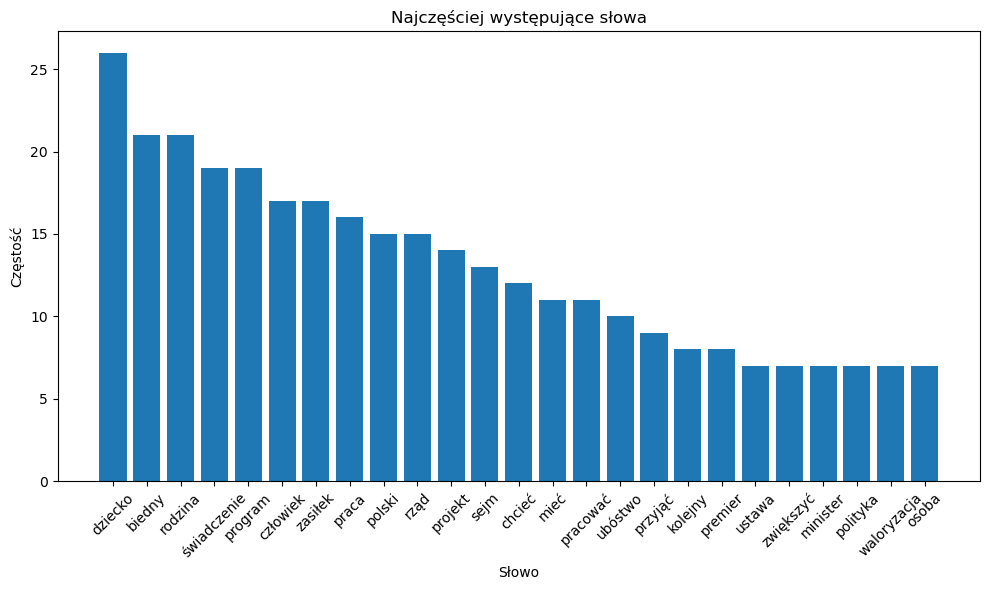

In [6]:
# Wybranie 25 najczęściej występujących słów
top_words = word_freq.most_common(25)

# Przygotowanie danych do wykresu
words = [word for word, _ in top_words]
frequencies = [freq for _, freq in top_words]

# Wygenerowanie wykresu słupkowego
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Słowo')
plt.ylabel('Częstość')
plt.title('Najczęściej występujące słowa')
plt.xticks(rotation=45)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

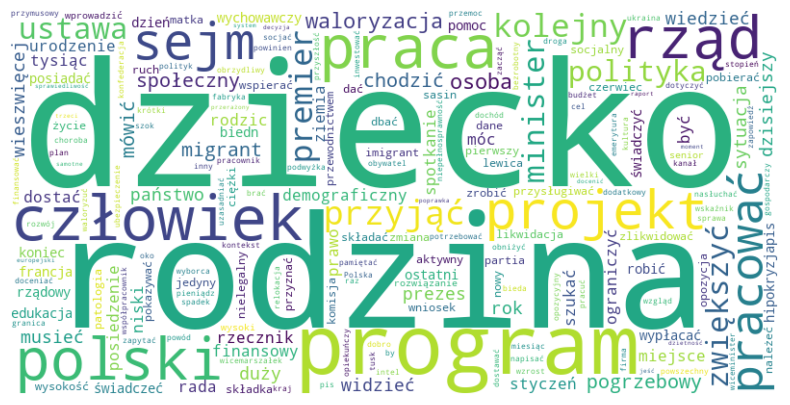

In [7]:
# Lista słów do usunięcia
words_to_remove = ['biedny', 'socjal','zasiłek','mieć','chcieć', "świadczenie", "ubóstwo"]

# Usunięcie słów z word_freq
word_freq_cleaned = {word: freq for word, freq in word_freq.items() if word not in words_to_remove}

# Generowanie chmury słów z oczyszczonymi częstościami słów
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_cleaned)

# Wyświetlanie chmury słów
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
# Podział listy częstości słów na podstawie części mowy
pos_freq = {}
for word, freq in word_freq.items():
    pos = nltk.pos_tag([word])[0][1]  # Analiza części mowy dla słowa
    if freq >= 3:  # Warunek częstotliwości >= 3
        if pos in pos_freq:
            pos_freq[pos][word] = freq
        else:
            pos_freq[pos] = {word: freq}

# Wyświetlanie częstości słów dla każdej części mowy o częstotliwości >= 3
for pos, freq in pos_freq.items():
    print(f'--- {pos} ---')
    sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)  # Sortowanie według częstości
    for word, frequency in sorted_freq:
        print(f'{word}: {frequency}')
    print('\n')

--- NN ---
dziecko: 26
biedny: 21
rodzina: 21
świadczenie: 19
program: 19
człowiek: 17
zasiłek: 17
praca: 16
polski: 15
rząd: 15
projekt: 14
sejm: 13
chcieć: 12
mieć: 11
pracować: 11
ubóstwo: 10
przyjąć: 9
kolejny: 8
premier: 8
ustawa: 7
zwiększyć: 7
minister: 7
polityka: 7
waloryzacja: 7
osoba: 7
chodzić: 6
społeczny: 6
migrant: 6
mówić: 6
pogrzebowy: 6
widzieć: 5
dzisiejszy: 5
wiedzieć: 5
wieszwięcej: 5
musieć: 5
duży: 5
państwo: 5
rok: 5
sytuacja: 5
szukać: 4
miejsce: 4
ziemia: 4
demograficzny: 4
tysiąc: 4
spotkanie: 4
być: 4
rada: 4
posiedzenie: 4
socjal: 4
rzecznik: 4
styczeń: 4
rodzic: 4
niski: 4
prawo: 4
ograniczyć: 4
dostać: 4
móc: 4
finansowy: 4
urodzenie: 4
świadczeć: 3
ostatni: 3
dzień: 3
wychowawczy: 3
biedn: 3
rządowy: 3
hipokryzjapis: 3
koniec: 3
pomoc: 3
posiadać: 3
wypłacać: 3
robić: 3
francja: 3
edukacja: 3
świadczyć: 3
przysługiwać: 3
życie: 3
zlikwidować: 3
przewodnictwem: 3
likwidacja: 3
imigrant: 3
jedyny: 3
wysokość: 3
składać: 3
wniosek: 3
czerwiec: 3
nowy: 3
pie

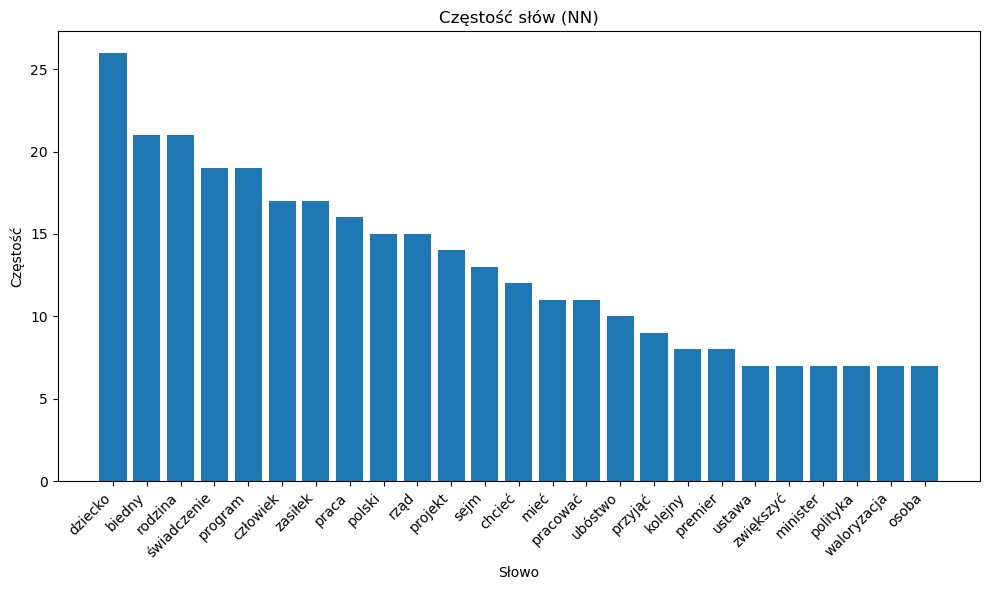

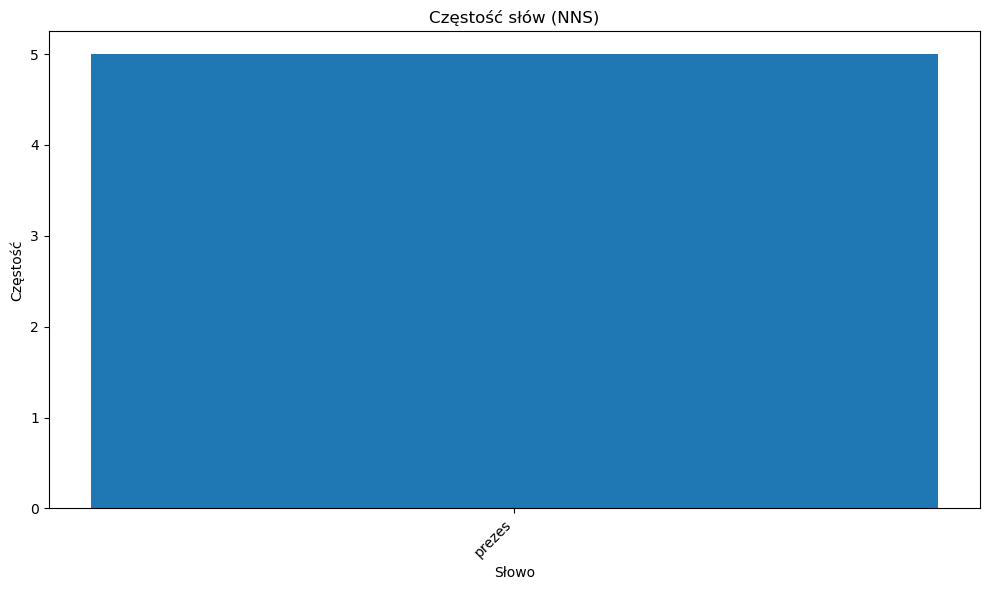

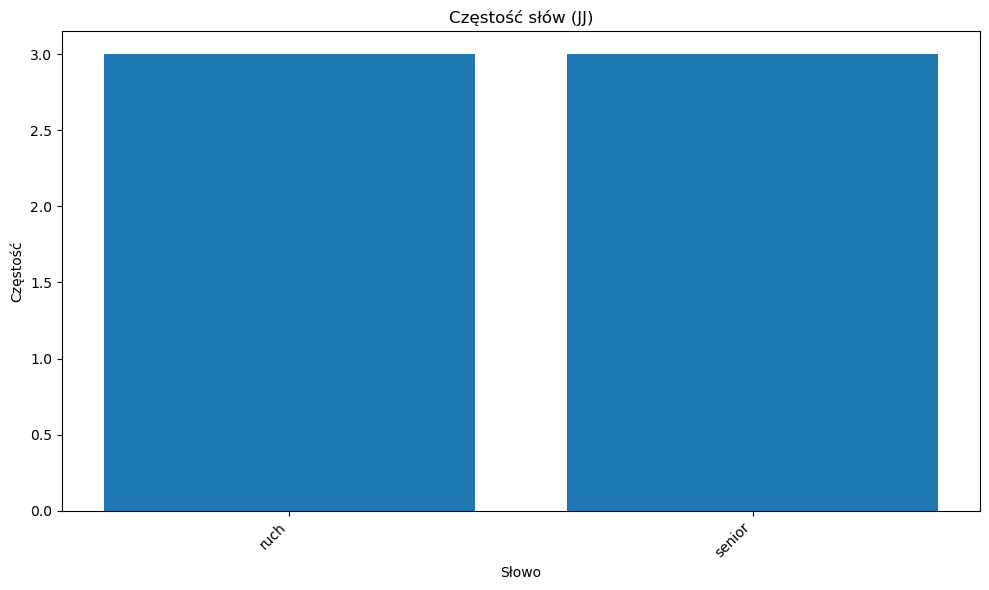

In [9]:
# Wygenerowanie wykresów dla każdej części mowy
for pos, freq in pos_freq.items():
    sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)  # Sortowanie według częstości
    words = [word for word, _ in sorted_freq[:25]]  # Wybór najczęstszych 25 słów
    frequencies = [frequency for _, frequency in sorted_freq[:25]]

    # Wygenerowanie wykresu słupkowego dla danej części mowy
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.xlabel('Słowo')
    plt.ylabel('Częstość')
    plt.title(f'Częstość słów ({pos})')
    plt.xticks(rotation=45, ha='right')  # Skrócenie etykiet i obrót o 45 stopni
    plt.tight_layout()

    # Wyświetlenie wykresu
    plt.show()

In [10]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

df['Subjectivity'] = df['CLEANED_TEXT'].apply(getSubjectivity)
df['Polarity'] = df['CLEANED_TEXT'].apply(getPolarity)

df.head(5)

,text,name,tweetLink,CLEANED_TEXT,Subjectivity,Polarity
0,"Bill Gates chce, aby wszyscy doświadczyli mala...",Prześladowany Politycznie Banowany,https://twitter.com/banowany86345/status/16765...,chcieć doświadczyć malaria biedny człowiek,0.0,0.0
1,"To są biedni ludzie, szukający swojego miejsca...",APrawdaWasWyzwoli,https://twitter.com/KrzychuBlues/status/167547...,biedny człowiek szukać miejsce ziemia,0.0,0.0
2,Wojowniczo antyimigrancki Tusk na krótkim nagr...,Radosław Fogiel,https://twitter.com/radekfogiel/status/1675488...,antyimigrancki tusk krótki nagranie biedny czł...,0.0,0.0
3,"Szok😡. Tetiana Kamraceva-Holodupceva, ""uchodźc...",DUCH,https://twitter.com/PanDuchPL/status/167516486...,szok tetiać kamracevaholodupceva uchodźczynia ...,0.0,0.0
4,Kilka awantur w 🇩🇪 z ostatnich dni:\n- były am...,Patrycja Anna Tepper,https://twitter.com/tepper_anna/status/1676283...,awantura ostatni dzień ambasador melnyk demolo...,0.0,0.0


In [11]:
def getAnalysis(score):
    if score <0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Analysis"] = df['Polarity'].apply(getAnalysis)
df.head(5)

,text,name,tweetLink,CLEANED_TEXT,Subjectivity,Polarity,Analysis
0,"Bill Gates chce, aby wszyscy doświadczyli mala...",Prześladowany Politycznie Banowany,https://twitter.com/banowany86345/status/16765...,chcieć doświadczyć malaria biedny człowiek,0.0,0.0,Neutral
1,"To są biedni ludzie, szukający swojego miejsca...",APrawdaWasWyzwoli,https://twitter.com/KrzychuBlues/status/167547...,biedny człowiek szukać miejsce ziemia,0.0,0.0,Neutral
2,Wojowniczo antyimigrancki Tusk na krótkim nagr...,Radosław Fogiel,https://twitter.com/radekfogiel/status/1675488...,antyimigrancki tusk krótki nagranie biedny czł...,0.0,0.0,Neutral
3,"Szok😡. Tetiana Kamraceva-Holodupceva, ""uchodźc...",DUCH,https://twitter.com/PanDuchPL/status/167516486...,szok tetiać kamracevaholodupceva uchodźczynia ...,0.0,0.0,Neutral
4,Kilka awantur w 🇩🇪 z ostatnich dni:\n- były am...,Patrycja Anna Tepper,https://twitter.com/tepper_anna/status/1676283...,awantura ostatni dzień ambasador melnyk demolo...,0.0,0.0,Neutral


In [12]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+sortedDF['CLEANED_TEXT'][i])
        print()
        j=j+1

In [13]:
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending = False)
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['CLEANED_TEXT'][i])
        print()
        j=j+1

1) biedny człowiek szukać miejsce ziemia robić obrzydliwy ponury propaganda wymierzony migrant człowiek potrzebować pomoc biedny człowiek



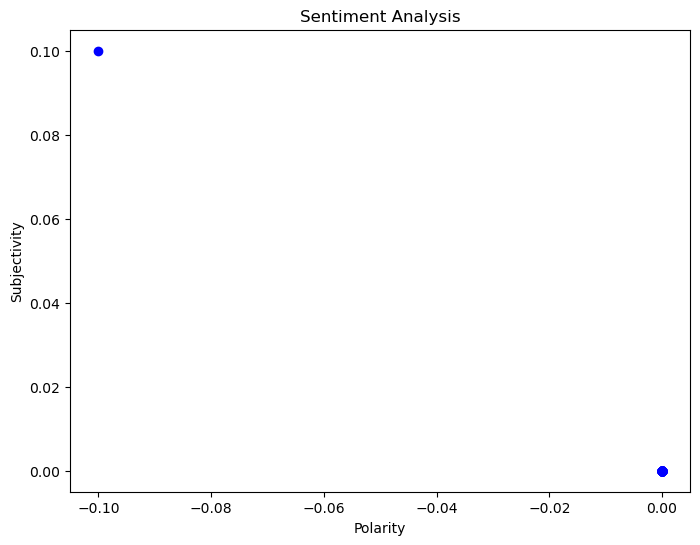

In [14]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [15]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['CLEANED_TEXT']

round(ptweets.shape[0] / df.shape[0] *100 , 1)

0.0

In [16]:
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['CLEANED_TEXT']

round(ptweets.shape[0] / df.shape[0] *100 , 1)

0.9

In [17]:
ptweets = df[df.Analysis == 'Neutral']
ptweets = ptweets['CLEANED_TEXT']

round(ptweets.shape[0] / df.shape[0] *100 , 1)

99.1

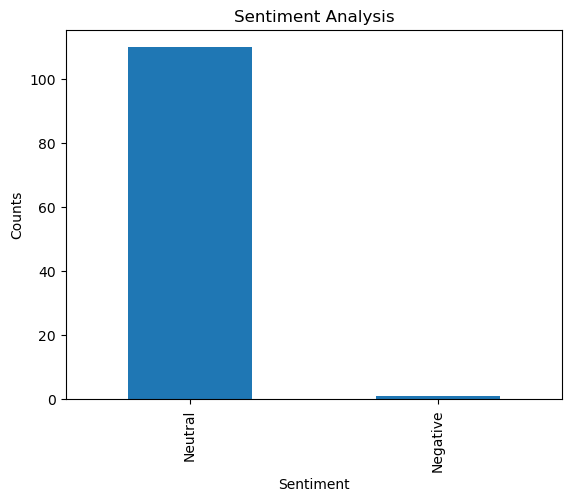

In [18]:
df['Analysis'].value_counts()

plt.title("Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [19]:
# Połączenie oczyszczonych tweetów w jednozdaniowy tekst
combined_text = ' '.join(df['CLEANED_TEXT'])

# Analiza sentymentu dla całego tekstu tweetów naraz
sentiment = TextBlob(combined_text).sentiment.polarity

# Wyświetlenie sentymentu
print('Sentiment:', sentiment)

Sentiment: -0.05
